In [10]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

In [7]:
# Load a different pre-trained model from TensorFlow Hub (Variation)
model_url = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"
model = hub.KerasLayer(model_url, input_shape=(299, 299, 3), trainable=False)

# Alternative image URL due to access restrictions
alternative_image_url = "https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg"


In [8]:
# Load an example image (Variation: higher resolution and different dataset)
def load_and_preprocess_image(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    image = image.resize((299, 299))
    img_array = np.array(image) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return image, img_array


In [11]:
# Load alternative image
image, processed_image = load_and_preprocess_image(alternative_image_url)

# Predict
predictions = model(processed_image)
predicted_class = np.argmax(predictions[0], axis=-1)


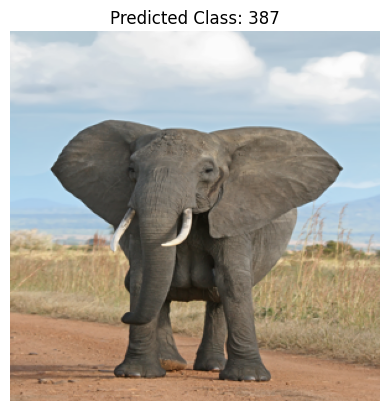

In [12]:
# Display results
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis("off")
plt.show()
